# Data Analysis of Games

## Importing libraries, reading dataframe and data overview

In [1143]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st

# Reading dataframe
df = pd.read_csv('../games.csv')

# Data overview
print(df.head(10))
df.info()

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

## Preparing dataframe

### Format column headings to lowercase letters

In [1144]:
df.columns = (
 df.columns
 .str
 .lower()
)

print (df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Changing data types stored in 'year_of_release' column to integer

In [1145]:
# Since there are empty values ​​in the column and the integer data type does not accept empty values ​​in the column, and since the sales analysis will be done based on years, the rows are deleted from the dataframe
df = df.dropna(subset=['year_of_release'])

# Then, the values are converted from float to int
df['year_of_release'] = (
  df['year_of_release']
  .astype(int)
)

# Checking the result
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### Changing data types stored in 'user_score' to float

In [1146]:
# Since 'user_score' contains 2376 'tbd' (to be determined) values, conversion is not possible directly
tbdb = df[df['user_score'] == 'tbd'] 
print(tbdb)

# To change the data types of the user_score column from object to float, first 'tbd' values ​​are replaced with NaN
df['user_score'] = (
  df['user_score']
  .replace('tbd', np.nan)
)

# Then, the values are converted from object to float
df['user_score'] = (
  df['user_score']
  .astype(float)
)

# Checking the result
df.info()

                                 name platform  year_of_release       genre  \
119                     Zumba Fitness      Wii             2010      Sports   
301    Namco Museum: 50th Anniversary      PS2             2005        Misc   
520                   Zumba Fitness 2      Wii             2011      Sports   
645                      uDraw Studio      Wii             2010        Misc   
718                   Just Dance Kids      Wii             2010        Misc   
...                               ...      ...              ...         ...   
16695                 Planet Monsters      GBA             2001      Action   
16697                Bust-A-Move 3000       GC             2003      Puzzle   
16698                Mega Brain Boost       DS             2008      Puzzle   
16704                        Plushees       DS             2008  Simulation   
16706   Men in Black II: Alien Escape       GC             2003     Shooter   

       na_sales  eu_sales  jp_sales  other_sales  c

### Dealing with missing values ​​in 'name' column

In [1147]:
# Filter dataframe to show only rows with no data in 'name' column
no_name = (
  df[df['name']
  .isna()]
)
print(no_name)

# Delete the 2 rows from the dataframe with no data in the 'name' column, which are the same as the ones with no data in the 'genre' column
df = df.dropna(subset=['name'])

# Checking the result
df.info()

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64

### Add column with total sales

In [1148]:
df['total_sales'] = (
  df['na_sales'] 
  + df['eu_sales'] 
  + df['jp_sales']
  + df['other_sales']
)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Comments

1. Rows with missing values ​​in the 'name', 'genre' and 'year_of_release' columns have been deleted. 
2. The 'year_of_release' and 'user_score' columns have been changed to integer and float, respectively.
3. The last three columns ('critic_score', 'user_score' and 'rating') have empty cells, possibly because it was not mandatory to rate the games. Missing values ​​at those columns will be left empty, since they do not influence the analysis. 
4. The 'tbd' values ​​in the 'user_score' column have been deleted and left empty (Nan).
5. A column with the sum of sales for each game has been added.

## Data Analysis

### Number of games released per year

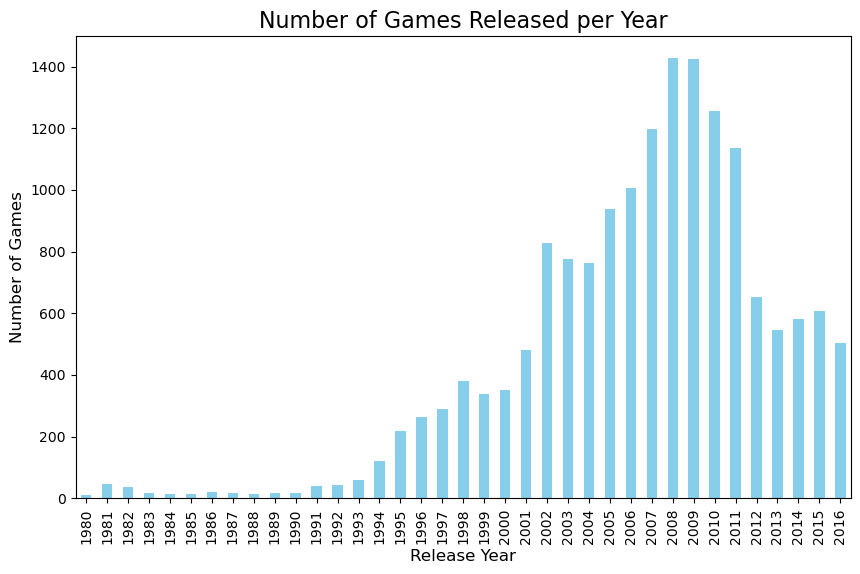

In [1149]:
# Games released per year
games_releases_per_year = (
  df['year_of_release']
  .value_counts()
  .sort_index()
)

# Creating a simple bar plot
plt.figure(figsize=(10, 6))
games_releases_per_year.plot(kind='bar', color='skyblue')

# Adding title and labels to axes
plt.title('Number of Games Released per Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)

# Showing plot
plt.show()

### Comments
The period between 2002 and 2011 was especially important in terms of the number of games released.

### Total sales per platform

In [1150]:
# Number of sales by platform
total_sales_per_platform = (
  df.groupby('platform')['total_sales']
  .sum()
  .reset_index()
  .sort_values('total_sales', ascending = False)
)

# Checking the result
total_sales_per_platform

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


### Comments
The 5 best-selling platforms in the period of analysis were PS2, X360, PS3, Wii, DS.

   platform  year_of_release  total_sales
0       PS2             2000        39.17
1       PS2             2001       166.43
2       PS2             2002       205.38
3       PS2             2003       184.31
4       PS2             2004       211.81
5       PS2             2005       160.66
6       PS2             2006       103.42
7       PS2             2007        75.99
8       PS2             2008        53.90
9       PS2             2009        26.40
10      PS2             2010         5.64
11      PS2             2011         0.45
12      PS3             2006        20.96
13      PS3             2007        73.19
14      PS3             2008       118.52
15      PS3             2009       130.93
16      PS3             2010       142.17
17      PS3             2011       156.78
18      PS3             2012       107.36
19      PS3             2013       113.25
20      PS3             2014        47.76
21      PS3             2015        16.82
22      PS3             2016      

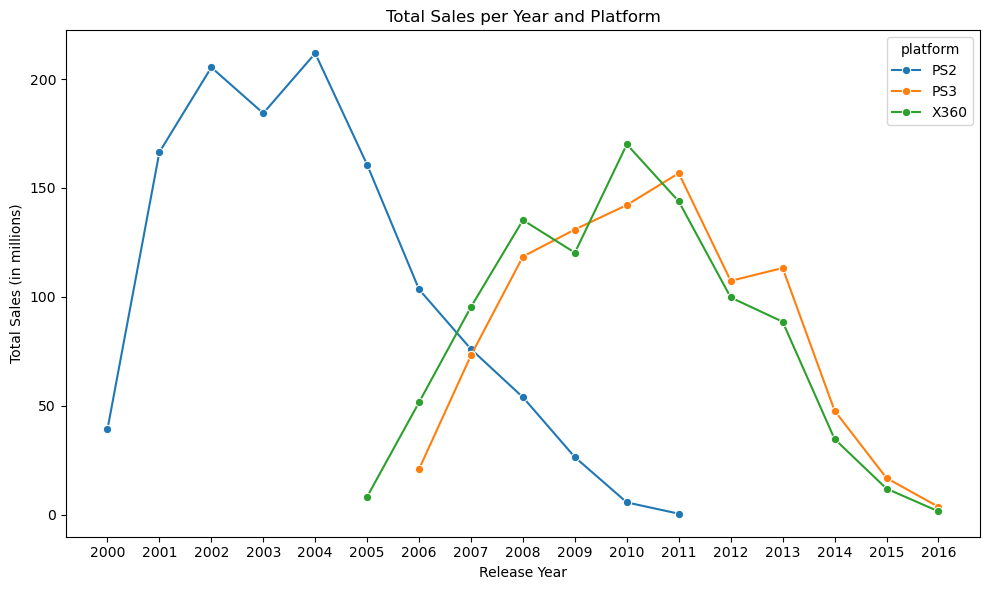

In [1151]:
# Creating a dataframe with data from the 3 best-selling platforms
top3_platforms = (
  df[df['platform'].isin(['PS2', 'X360', 'PS3'])]
  .groupby(['platform', 'year_of_release'])['total_sales']
  .sum()
  .reset_index()
)

# Checking the result
print(top3_platforms)

# Creating a line plot
plt.figure(figsize = (10, 6))
sns.lineplot(data = top3_platforms, x = 'year_of_release', y = 'total_sales', hue = 'platform', marker = 'o')

# Adding title and labels to axes
plt.title('Total Sales per Year and Platform')
plt.xlabel('Release Year')
plt.ylabel('Total Sales (in millions)')
plt.xticks(top3_platforms['year_of_release'].unique())

# Show plot
plt.tight_layout()
plt.show()

### Comments
Considering the top 3 platforms 'PS2', 'X360', 'PS3', 'PS2' platform is older and had its peak sales in the year 2004, while X360 peaked in 2010 and PS3 in 2011.

### Popular platforms before and after the year 2000
#### First solution - Calculations

In [1152]:
# Checking platforms that used to be popular but now have no sales.
# How long does it take for new platforms to appear and old ones to disappear?

# 1.0 Creating a dataframe 'total_sales_by_year', which contains total sales ('total_sales') grouped by platform and release year
total_sales_by_year = (
  df
  .groupby(['platform', 'year_of_release'])
  .agg(
    total_sales = pd.NamedAgg(column = 'total_sales', aggfunc = 'sum')
  )
  .reset_index()
)

# 2.0 Creating a dataframe 'platform_by_year', which contains the years of release and end of each platform
platform_by_year = (
  df
  .groupby(['platform'])
  .agg(
    release_year = pd.NamedAgg(column = 'year_of_release', aggfunc = 'min'),
    finish_year = pd.NamedAgg(column = 'year_of_release', aggfunc = 'max'),
  )
  .reset_index()
) 

# 3.0 Creating a column in the 'platform_by_year' dataframe, which contains the lifespan of each platform
platform_by_year['lifespan'] = platform_by_year['finish_year'] - platform_by_year['release_year']

# 4.0 Merge dataframes 'total_sales_by_year' and 'platform_by_year'
merged_plat_sales_year = (
  total_sales_by_year
  .merge(
    platform_by_year,
    on = 'platform',
    how = 'left',
  ).drop_duplicates()
)

# Checking the result
print(merged_plat_sales_year)


# 5.0 Creating a dataframe for popular games before 2000
# Filter platforms whose 'finish_year' is less than or equal to 2000
old_popular_platforms = (
  merged_plat_sales_year[merged_plat_sales_year['finish_year'] <= 2000]
)
 
# Group by platform, keeping the colunms 'lifespan' and 'release_year' and get the total_sales of the groups
sales_old = (
  old_popular_platforms.groupby(['platform', 'lifespan', 'release_year'])['total_sales']
  .sum()
  .reset_index()
)

# Sort platforms by the sum of total sales
sales_old_sorted = sales_old.sort_values(by = 'total_sales', ascending=False)

# Checking the result
print(sales_old_sorted)


# 6.0 Creating a dataframe for popular games after 2000
# Filter platforms whose 'release_year' is more than or equal to 2000
new_popular_platforms = (
  merged_plat_sales_year[merged_plat_sales_year['finish_year'] > 2000]
)
 
# Group by platform and sum the total_sales, keeping the column 'release_year' 
sales_new = (
  new_popular_platforms.groupby(['platform', 'release_year'])['total_sales']
  .sum()
  .reset_index()
)

# Sort platforms by the sum of total sales
sales_new_sorted = sales_new.sort_values(by = 'total_sales', ascending = False)

# Checking the result
print(sales_new_sorted)


    platform  year_of_release  total_sales  release_year  finish_year  \
0       2600             1980        11.38          1980         1989   
1       2600             1981        35.68          1980         1989   
2       2600             1982        28.88          1980         1989   
3       2600             1983         5.84          1980         1989   
4       2600             1984         0.27          1980         1989   
..       ...              ...          ...           ...          ...   
233       XB             2008         0.18          2000         2008   
234     XOne             2013        18.96          2013         2016   
235     XOne             2014        54.07          2013         2016   
236     XOne             2015        60.14          2013         2016   
237     XOne             2016        26.15          2013         2016   

     lifespan  
0           9  
1           9  
2           9  
3           9  
4           9  
..        ...  
233        

#### Comments:
1. In this solution, a dataframe was created with the total sales by platform and year, with additional columns with information about the year of release, the final year of sale and the difference between them (platform lifespan).
2. For the analysis, it was created a dataframe whose final years were less than 2000 and it was grouped by platform. Then total_sales by group were calculated.
3. The conclusion was that the platforms 'NES', 'SNES' and '2600' were the oldest ones that sold the most. They had a lifespan of about 10 years.
4. Comparing the 3 most popular platforms before 2000 with the 3 most popular after 2000 'PS2', 'X360', 'PS3', there is a gap of about 15 years between the releases.


#### Second solution - Visual Analysis

In [1153]:
# Checking platforms that used to be popular but now have no sales.
# How long does it take for new platforms to appear and old ones to disappear?

# Group by platform and year_of_release
sales_by_platform_per_year = (
  df.groupby(['platform', 'year_of_release'])['total_sales']
  .sum()
  .reset_index()
)
print(sales_by_platform_per_year)

# Creating an interative plot of lines
fig = px.line(
    sales_by_platform_per_year, 
    x = 'year_of_release', 
    y = 'total_sales',
    color = 'platform',
    title = 'Total Sales per Platform per Year',
    labels = {'year_of_release': 'Release Year', 'total_sales': 'Total Sales (in millions)'}
)

# Showing the plot
fig.show()

    platform  year_of_release  total_sales
0       2600             1980        11.38
1       2600             1981        35.68
2       2600             1982        28.88
3       2600             1983         5.84
4       2600             1984         0.27
..       ...              ...          ...
233       XB             2008         0.18
234     XOne             2013        18.96
235     XOne             2014        54.07
236     XOne             2015        60.14
237     XOne             2016        26.15

[238 rows x 3 columns]


#### Comments: 
1. Based on visual analysis, the platforms 'NES', 'SNES', and '2600' seems the most popular in the past few years, but are no longer popular in recent years.
2. The platforms mentioned lasted about 10 years.
3. The platforms 'PS2', 'X360', and 'PS3' (popular after 2000) took about 10 years to appear and disappear, and about every 5 years a new platform is released.

### Determining a period for data analysis to build a model for 2017
In the fast-paced gaming industry, avoiding longer periods is important, as we may end up tracking outdated trends. Therefore, is was chosen a period of 3 years, between 2014 to 2016.  

In [1154]:
# Create a new dataframe from the original one with data from 2014 
filtered_df = df[df['year_of_release'] >= 2014].reset_index()

# Showing the result
filtered_df

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1685,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1686,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1687,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Best selling platforms
- Which platforms are leading in sales?
- Which are growing or declining?
- Select several potentially profitable platforms.

In [1155]:
# Group the dataframe filtered_df by platform, sum the total_sales per platform and sort the results
grouped_platforms = (
  filtered_df
  .groupby('platform')['total_sales']
  .sum()
  .sort_values(ascending = False)
)

# Showing the results
print(grouped_platforms)

# Selecting pottentially lucrative platforms in the period
potentially_lucrative = (
 filtered_df[filtered_df['platform'].isin(['PS4', 'XOne', '3DS', 'PS3', 'X360'])]
 .groupby(['platform', 'year_of_release'])['total_sales']
 .sum()
 .reset_index()
)

# Showing the results
print(potentially_lucrative)

# Creating an interative plot of lines
fig = px.line(
    potentially_lucrative, 
    x = 'year_of_release', 
    y = 'total_sales',
    color = 'platform',
    title = 'Potentially Lucrative Platforms Between 2014-2016: Total Sales per Year',
    labels = {'year_of_release': 'Year', 'total_sales': 'Total Sales (in millions)'},
    markers = True
)

# Improving layout
fig.update_layout(
    width = 900,  # Plot width
    height = 600,  # Plot height
    xaxis = dict (
        tickmode = 'linear',
        dtick = 1,  # Defining 1 year interval at X-axis
        range = [2014, 2016],  # Limiting X-axis
    ),
)

# Showing the plot
fig.show()

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64
   platform  year_of_release  total_sales
0       3DS             2014        43.76
1       3DS             2015        27.78
2       3DS             2016        15.14
3       PS3             2014        47.76
4       PS3             2015        16.82
5       PS3             2016         3.60
6       PS4             2014       100.00
7       PS4             2015       118.90
8       PS4             2016        69.25
9      X360             2014        34.74
10     X360             2015        11.96
11     X360             2016         1.52
12     XOne             2014        54.07
13     XOne             2015        60.14
14     XOne             2016        26.15


### Comments:
- The leading platforms during the period of 2014 to 2016 were 'PS4', 'XOne', '3DS', 'PS3', 'X360'. PS4 and XOne were the only ones showing increasing trends between 2014 and 2015, and then decreasing from 2015 to 2016. The others showed decreasing trends of sales in all period. 

### Global sales per platform

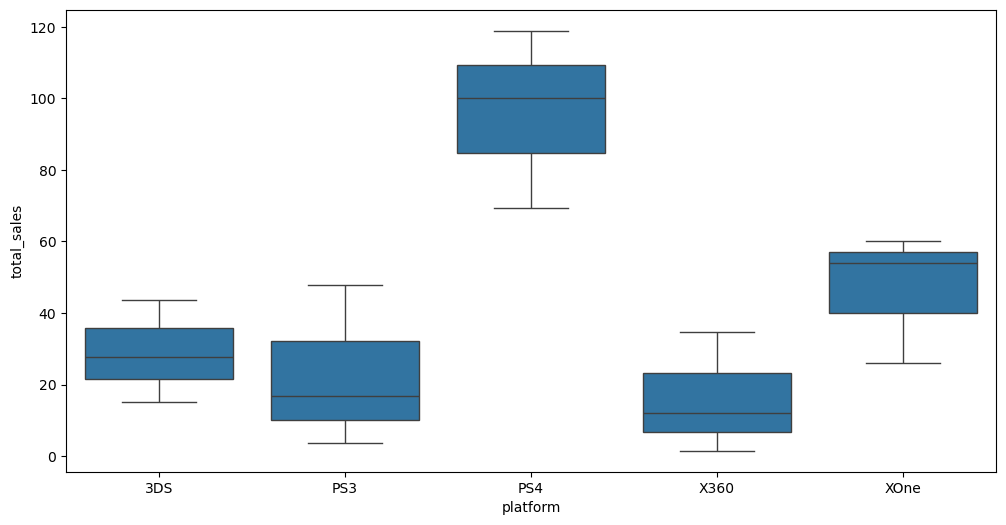

platform
PS4     96.050000
XOne    46.786667
3DS     28.893333
PS3     22.726667
X360    16.073333
Name: total_sales, dtype: float64

In [1156]:
# 1. Building a boxplot for global sales by platform, considering the 5 recent potentially profitable platforms
# Adjusting the plot size 
plt.figure(figsize=(12, 6))

# Plotting
sns.boxplot(
 x = potentially_lucrative['platform'],
 y = potentially_lucrative['total_sales'],
 data = df
)

# Showing the result
plt.show()


# 2. Calculating the average of annual sales per platform
mean_potential_lucrative = (
 potentially_lucrative
 .groupby(['platform'])['total_sales']
 .mean()
 .sort_values(ascending = False)
)

# Showing the result
mean_potential_lucrative

### Comments
1. It was built a boxplot for the global sales by platform. 
2. The top 5 best-selling platforms between 2014 and 2016 had very different results. 
3. The average of annual sales of 'PS4' platform is about twice than the 'XOne' platform'.

### Professional and Users Rates vs Sales

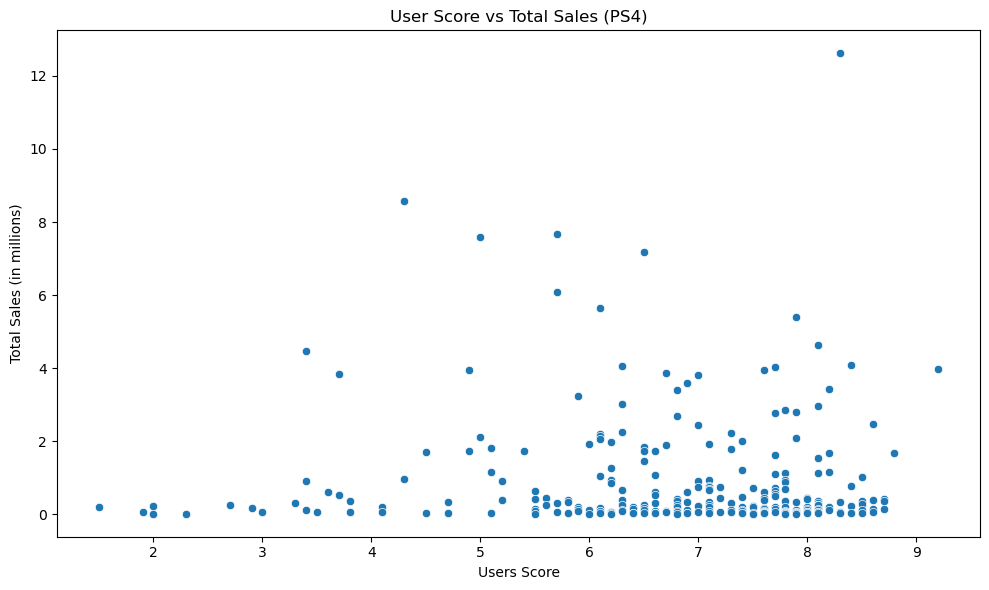

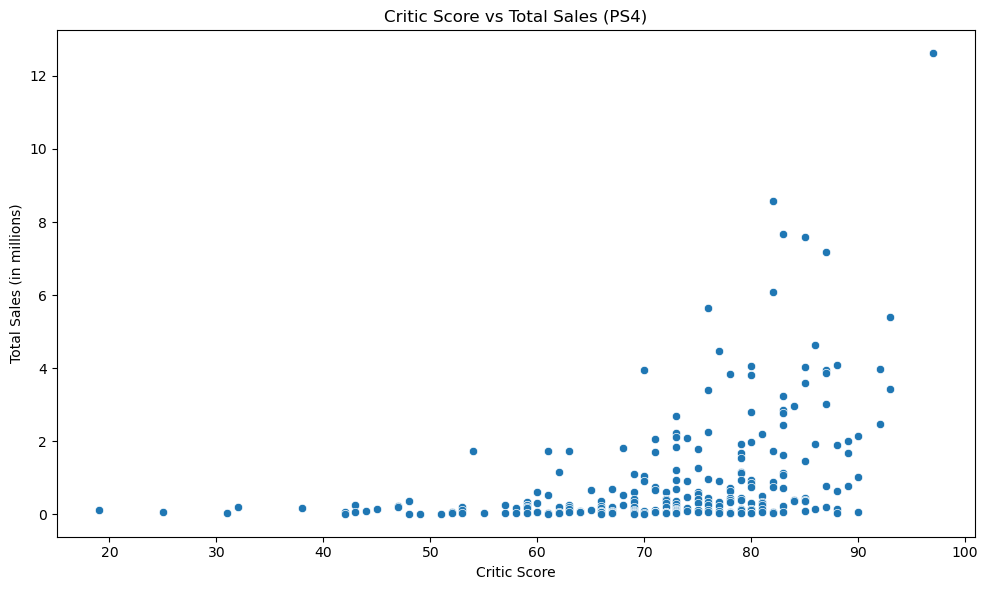

The correlation between User Score and Total Sales is -0.03
The correlation between Critic Score and Total Sales is 0.41


In [1157]:
# 1. Creating a dataframe with data of PS4 platform
df_PS4 = df[df['platform'] == 'PS4']

# Showing the dataframe
df_PS4.head()

# 2. Creating a scatter plot for user_score vs total_sales
# Buiding the plot
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x = 'user_score', y = 'total_sales', data = df_PS4)

# Adding title and labels to axes
plt.title('User Score vs Total Sales (PS4)')
plt.xlabel('Users Score')
plt.ylabel('Total Sales (in millions)')

# Showing the plot
plt.tight_layout()
plt.show()


# 3. Creating a scatter plot for critic_score vs total_sales
# Buiding the plot
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x = 'critic_score', y = 'total_sales', data = df_PS4)

# Adding title and labels to axes
plt.title('Critic Score vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

# Showing the plot
plt.tight_layout()
plt.show()


# 4. Calculating the correlation user_score vs total_sales
correlation = df_PS4['user_score'].corr(df_PS4['total_sales'])
print(f'The correlation between User Score and Total Sales is {correlation:.2f}')

# 5. Calculating the correlation critic_score vs total_sales
correlation = df_PS4['critic_score'].corr(df_PS4['total_sales'])
print(f'The correlation between Critic Score and Total Sales is {correlation:.2f}')

### Comments:
Based on the visual analysis of the plots and the correlations calcs, the scores do not influence significantly the sales of the platform 'PS4'. However, the critic scores is about 3 times more important than the users scores in terms of total sales. 

In [1158]:
# Calculating correlations to other platforms 

# 1. Creating a dataframe with data of XOne
df_XOne = df[df['platform'] == 'XOne']

# 2. Calculating the correlation critic_score vs total_sales
correlation = df_XOne['critic_score'].corr(df_XOne['total_sales'])
print(f'For XOne platform, the correlation between Critic Score and Total Sales is  {correlation:.2f}')

# 3. Calculating the correlation user_score vs total_sales
correlation = df_XOne['user_score'].corr(df_XOne['total_sales'])
print(f'For XOne platform, the correlation between User Score and Total Sales is {correlation:.2f}')

# 4. Creating a dataframe with data of 3DS
df_X360 = df[df['platform'] == 'X360']

# 5. Calculating the correlation critic_score vs total_sales
correlation = df_X360['critic_score'].corr(df_X360['total_sales'])
print(f'For X360 platform, the correlation between Critic Score and Total Sales is  {correlation:.2f}')

# 6. Calculating the correlation user_score vs total_sales
correlation = df_X360['user_score'].corr(df_X360['total_sales'])
print(f'For X360 platform, the correlation between User Score and Total Sales is {correlation:.2f}')

For XOne platform, the correlation between Critic Score and Total Sales is  0.42
For XOne platform, the correlation between User Score and Total Sales is -0.07
For X360 platform, the correlation between Critic Score and Total Sales is  0.39
For X360 platform, the correlation between User Score and Total Sales is 0.11


### Comments
The correlactions for XOne and X360 follow the same trend than the ones of PS4 platform: critic scores have more influence in sales, than users scores. 

### Games genre analysis 

In [1159]:
# Games per genre calculation
games_per_genre = (
  df['genre']
  .value_counts()
  .reset_index()
)

# Renaming columns
games_per_genre.columns = ['genre', 'games_count']

# Grouping dataframe by genre
sales_per_genre = (
  df
  .groupby(['genre'])
  .agg(
    total_sales = pd.NamedAgg(column = 'total_sales', aggfunc = 'sum')
  )
  .reset_index()
  .sort_values(by = 'total_sales', ascending = False)
)

# Mergind data
merged_genre_df = (
  sales_per_genre
  .merge(
    games_per_genre,
    on = 'genre',
    how = 'left'
  )
)

# Showing results
merged_genre_df


,genre,total_sales,games_count
0,Action,1716.52,3307
1,Sports,1309.67,2306
2,Shooter,1041.36,1296
3,Role-Playing,931.08,1481
4,Platform,825.55,878
5,Misc,790.29,1721
6,Racing,723.49,1226
7,Fighting,442.66,837
8,Simulation,387.96,857
9,Puzzle,239.89,569


### Comments
The two most profitable genres, action and sports, have the largest number of games. For the other genres, this relationship is not straightforward.

### Region analysis

In [1160]:
# Function to determine the top platforms of each region
def top_platforms_by_region(df, sales_column, region_name):
    """
    Function to determine the top 5 sales platforms in a specific region.
    
    Args:
        df: DataFrame containing the sales data
        sales_column: Name of the sales column for the region
        region_name: Name of the region for the output title
        
    Returns:
        DataFrame of the top 5 platforms.
    """
    
    sales_per_platform = (
        df.groupby('platform')[sales_column]
        .sum()
        .reset_index()
    )
    top5_platforms = (
        sales_per_platform
        .nlargest(5, sales_column)
        .reset_index(drop=True)
    )
    print(f'The top 5 platforms in {region_name}, in terms of sales, are: ')
    print(top5_platforms)
    return 

# Calling function for each region
top_platforms_by_region(df, 'na_sales', 'North America')
top_platforms_by_region(df, 'eu_sales', 'Europe')
top_platforms_by_region(df, 'jp_sales', 'Japan')
top_platforms_by_region(df, 'other_sales', 'Other regions')

The top 5 platforms in North America, in terms of sales, are: 
  platform  na_sales
0     X360    595.74
1      PS2    572.92
2      Wii    486.87
3      PS3    390.13
4       DS    380.31
The top 5 platforms in Europe, in terms of sales, are: 
  platform  eu_sales
0      PS2    332.63
1      PS3    327.21
2     X360    268.32
3      Wii    258.32
4       PS    212.39
The top 5 platforms in Japan, in terms of sales, are: 
  platform  jp_sales
0       DS    175.02
1       PS    139.78
2      PS2    137.54
3     SNES    116.55
4      3DS    100.62
The top 5 platforms in Other regions, in terms of sales, are: 
  platform  other_sales
0      PS2       190.47
1      PS3       134.59
2     X360        84.88
3      Wii        77.71
4       DS        59.04


### Comments
1. Overall, the sales of the top 5 platforms in North America are almost double the sales amounts of the top 5 platforms in Europe, which are almost double the sales amounts of the top 5 platforms in Japan.
2. There are differences of the preferenced platforms at each region, but PS2 is the one present in the top 5 of all regions.

In [1161]:
# Function to determine the top 5 games genres of each region
def top_genres_by_region(df, sales_column, region_name):
    """
    Function to determine the top 5 sales genres in a specific region.
    
    Args:
        df: DataFrame containing the sales data
        sales_column: Name of the sales column for the region
        region_name: Name of the region for the output title
        
    Returns:
        The top 5 genres.
    """
    
    sales_per_genre = (
        df
        .groupby('genre')[sales_column]
        .sum()
        .reset_index()
    )

    top5_genres = (
        sales_per_genre
        .nlargest(5, sales_column)
        .reset_index(drop=True)
    )
    print(f'The top 5 genres in {region_name}, in terms of sales, are: ')
    print(top5_genres)
    return 

# Calling function for each region
top_genres_by_region(df, 'na_sales', 'North America')
top_genres_by_region(df, 'eu_sales', 'Europe')
top_genres_by_region(df, 'jp_sales', 'Japan')
top_genres_by_region(df, 'other_sales', 'Other regions')

The top 5 genres in North America, in terms of sales, are: 
      genre  na_sales
0    Action    863.17
1    Sports    671.20
2   Shooter    584.83
3  Platform    444.44
4      Misc    399.57
The top 5 genres in Europe, in terms of sales, are: 
     genre  eu_sales
0   Action    510.99
1   Sports    371.33
2  Shooter    314.52
3   Racing    234.49
4     Misc    210.60
The top 5 genres in Japan, in terms of sales, are: 
          genre  jp_sales
0  Role-Playing    353.39
1        Action    160.14
2        Sports    134.93
3      Platform    130.71
4          Misc    107.02
The top 5 genres in Other regions, in terms of sales, are: 
     genre  other_sales
0   Action       182.22
1   Sports       132.21
2  Shooter       103.33
3   Racing        75.51
4     Misc        73.10


### Comments
1. The top 5 genres in North America, Europe and Other Regions are similar. The top 3 genres are Action, Sports and Shooter. The variations are in the fourth positions, varying between Platform and Racing. 
2. The fifth position are the same for all, with the platform Misc.  
3. In all regions, the Action, Sports and Misc genres are popular.

## ESRB Classification analysis

In [1162]:
# Function to determine the top 5 ESRB classification of each region
def top_class_by_region(df, sales_column, region_name):
    """
    Function to determine the top 5 ESRB classification in a specific region.
    
    Args:
        df: DataFrame containing the sales data
        sales_column: Name of the sales column for the region
        region_name: Name of the region for the output title
        
    Returns:
        The top 5 ESRB classification.
    """
    
    sales_per_class = (
        df
        .groupby('rating')[sales_column]
        .sum()
        .reset_index()
    )

    top5_class = (
        sales_per_class
        .nlargest(5, sales_column)
        .reset_index(drop=True)
    )
    print(f'The top 5 ESRB classification in {region_name}, in terms of sales, are: ')
    print(top5_class)
    return 

# Calling function for each region
top_class_by_region(df, 'na_sales', 'North America')
top_class_by_region(df, 'eu_sales', 'Europe')
top_class_by_region(df, 'jp_sales', 'Japan')
top_class_by_region(df, 'other_sales', 'Other regions')



The top 5 ESRB classification in North America, in terms of sales, are: 
  rating  na_sales
0      E   1274.24
1      T    747.60
2      M    742.89
3   E10+    345.50
4    K-A      2.56
The top 5 ESRB classification in Europe, in terms of sales, are: 
  rating  eu_sales
0      E    703.87
1      M    480.00
2      T    421.79
3   E10+    183.35
4     AO      0.61
The top 5 ESRB classification in Japan, in terms of sales, are: 
  rating  jp_sales
0      E    197.96
1      T    150.70
2      M     63.58
3   E10+     40.20
4    K-A      1.46
The top 5 ESRB classification in Other regions, in terms of sales, are: 
  rating  other_sales
0      E       231.54
1      M       176.06
2      T       152.99
3   E10+        71.93
4     EC         0.11


### Comments
1. The ESRB classification seems to affect the sales per region. 
2. The top 4 classifications are the same in all regions. 
3. The fifth position represents a very small percentage of the total sales in all regions. 

## Hypothesis Tests - Student's t-test

### Test 1: The average user ratings for "Xbox One" and "PC" platforms are the same

In [1163]:
"""
The null hypothesis (H0) will be: "The average ratings of users on the Xbox One and PC platforms are the same."
The alternative hypothesis will be: "The average ratings of users on the Xbox One and PC platforms are different."
The alpha threshold will be: 0.05
"""

# Filtering data per platform and removing NaNs
xone_scores = df[df['platform'] == "XOne"]['user_score'].dropna()
pc_scores = df[df['platform'] == "PC"]['user_score'].dropna()

# Calculating the mean and variance (for refernece only)
xone_mean_user_score = xone_scores.mean()
xone_var_user_score = xone_scores.var()

pc_mean_user_score = pc_scores.mean()
pc_var_user_score = pc_scores.var()

print(f'For Xbox One users, the Mean of the ratings is {xone_mean_user_score:.2f} and the Variance is {xone_var_user_score:.2f}')
print(f'For PC users, the Mean of the ratings is {pc_mean_user_score:.2f} and the Variance is {pc_var_user_score:.2f}')

# Critical statistical significance (threshold)
alpha = 0.05

# Student's t-test for two independent samples. Use equal_var=False for unequal variances
result_1 = st.ttest_ind(xone_scores, pc_scores, equal_var = False)

# Print resulting p-value
print(f'P-Value: {result_1.pvalue:.2f}')

# Comparing P-Value and threshold and print conclusion
if result_1.pvalue < alpha:
    print("We reject the null hypothesis: The mean ratings of users on the Xbox One and PC platforms are different.")
else:
    print("We cannot reject the null hypothesis: The mean ratings of users on the Xbox One and PC platforms are the same.")

For Xbox One users, the Mean of the ratings is 6.52 and the Variance is 1.91
For PC users, the Mean of the ratings is 7.07 and the Variance is 2.35
P-Value: 0.00
We reject the null hypothesis: The mean ratings of users on the Xbox One and PC platforms are different.


### Test 2: Average user ratings for the Action and Sports genres are different

In [1164]:
"""
The null hypothesis (H0) will be: "The average user ratings for the Action and Sports genres are the same."
The alternative hypothesis will be: "The average user ratings for the Action and Sports genres are different."
The alpha threshold will be: 0.05
"""

# Filtering data per genre and removing NaNs
action_scores = df[df['genre'] == "Action"]['user_score'].dropna()
sports_scores = df[df['genre'] == "Sports"]['user_score'].dropna()

# Calculating the mean and variance (for refernece only)
action_mean_user_score = action_scores.mean()
action_var_user_score = action_scores.var()

sports_mean_user_score = sports_scores.mean()
sports_var_user_score = sports_scores.var()

print(f'For the Action genre, the Mean of the ratings is {action_mean_user_score:.2f} and the Variance is {action_var_user_score:.2f}')
print(f'For the Sports genre, the Mean of the ratings is {sports_mean_user_score:.2f} and the Variance is {sports_var_user_score:.2f}')

# Critical statistical significance (threshold)
alpha = 0.05

# Student's t-test for two independent samples. Use equal_var=False for unequal variances
result_2 = st.ttest_ind(action_scores, sports_scores, equal_var = False)

# Printing p-value 
print(f'P-Value: {result_2.pvalue:.2f}')

# Comparing P-Value and threshold and print conclusion
if result_2.pvalue < alpha:
    print("We reject the null hypothesis: The mean user ratings for the Action and Sports genres are different.")
else:
    print("We cannot reject the null hypothesis: The mean user ratings for the Action and Sports genres are the same.")

For the Action genre, the Mean of the ratings is 7.06 and the Variance is 2.03
For the Sports genre, the Mean of the ratings is 6.95 and the Variance is 2.62
P-Value: 0.07
We cannot reject the null hypothesis: The mean user ratings for the Action and Sports genres are the same.


### Comments
For reference:
1. The null hypothesis were formulated assuming that there is no effect or difference between the study conditions. The alternative hypothesis were one in which there is an effect or difference.
2. To test the hypotheses, the Student's t-test for independent samples was used. This test is appropriate when we want to compare the means of two groups and we have continuous data that may follow a normal distribution.
3. Equal Variance: equal_var = False was used, which is appropriate when the variances of the groups may be different (assuming that the data do not follow a normal distribution).
4. Statistical significance (alpha): the probability of rejecting the null hypothesis when it is true. The value means that a 5% chance of making a Type I error (rejecting the null hypothesis when it is true) is accepted. 
5. P-value: is the probability of observing the collected data (or something more extreme) under the assumption that the null hypothesis is true. If the p-value obtained from the test is less than the significance level, we reject the null hypothesis. Otherwise, we do not have enough evidence to reject it.